In [9]:
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, EarlyStopping
import matplotlib.pyplot as plt

In [10]:
train_data_gen = ImageDataGenerator(rescale=1.0/255)
validation_data_gen = ImageDataGenerator(rescale=1.0/255)

In [11]:
# Preprocess all train images
train_generator = train_data_gen.flow_from_directory(
    'data/train',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical'
)

# Preprocess all validation images
validation_generator = validation_data_gen.flow_from_directory(
    'data/test',
    target_size=(48, 48),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [12]:
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

cv2.ocl.setUseOpenCL(False)

emotion_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

In [15]:
history = emotion_model.fit(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64
        )

Epoch 1/50
448/448 [==============================] - 116s 259ms/step - loss: 1.5473 - accuracy: 0.3988 - val_loss: 1.3800 - val_accuracy: 0.4718
Epoch 2/50
448/448 [==============================] - 11s 24ms/step - loss: 1.3745 - accuracy: 0.4726 - val_loss: 1.3025 - val_accuracy: 0.4987
Epoch 3/50
448/448 [==============================] - 11s 24ms/step - loss: 1.2752 - accuracy: 0.5136 - val_loss: 1.2187 - val_accuracy: 0.5236
Epoch 4/50
448/448 [==============================] - 11s 23ms/step - loss: 1.1985 - accuracy: 0.5463 - val_loss: 1.2044 - val_accuracy: 0.5342
Epoch 5/50
448/448 [==============================] - 12s 26ms/step - loss: 1.1190 - accuracy: 0.5766 - val_loss: 1.1443 - val_accuracy: 0.5597
Epoch 6/50
448/448 [==============================] - 11s 25ms/step - loss: 1.0421 - accuracy: 0.6118 - val_loss: 1.1192 - val_accuracy: 0.5751
Epoch 7/50
448/448 [==============================] - 11s 25ms/step - loss: 0.9726 - accuracy: 0.6378 - val_loss: 1.1079 - val_accurac

In [16]:
import matplotlib.pyplot as plt

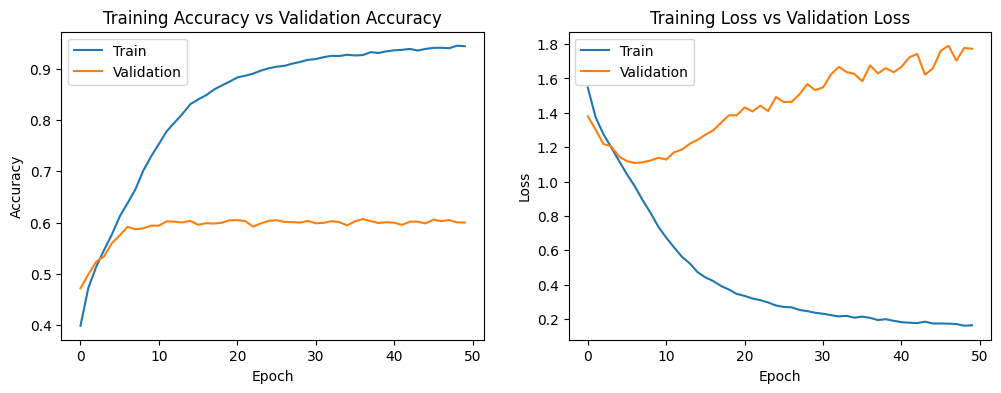

In [17]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [18]:
# save model structure in jason file
model_json = emotion_model.to_json()
with open("model9439.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
emotion_model.save_weights('model9439.h5')

In [19]:
scores = emotion_model.evaluate(train_generator)

449/449 [==============================] - 9s 19ms/step - loss: 0.0098 - accuracy: 0.9974


In [20]:
scores = emotion_model.evaluate(validation_generator)

113/113 [==============================] - 2s 21ms/step - loss: 1.7713 - accuracy: 0.6002
